Title: Variable Descriptions and Data Types

Content:

Variable Name |	Data Type	|Description
Bearer Id	  |object	Unique identifier for each session
Start	datetime64[ns]	Start time of the session
Start ms	float64	Milliseconds part of the start time
End	datetime64[ns]	End time of the session
End ms	float64	Milliseconds part of the end time
Dur. (ms)	float64	Duration of the session in milliseconds
IMSI	float64	International Mobile Subscriber Identity
MSISDN/Number	float64	Mobile Station International Subscriber Directory Number
IMEI	float64	International Mobile Equipment Identity
Handset Manufacturer	object	Manufacturer of the user's handset
Handset Type	object	Type/model of the user's handset
Social Media DL (Bytes)	float64	Data downloaded from social media applications
Social Media UL (Bytes)	float64	Data uploaded to social media applications
Google DL (Bytes)	float64	Data downloaded from Google applications
Google UL (Bytes)	float64	Data uploaded to Google applications
Email DL (Bytes)	float64	Data downloaded from email services
Email UL (Bytes)	float64	Data uploaded to email services
Youtube DL (Bytes)	float64	Data downloaded from YouTube
Youtube UL (Bytes)	float64	Data uploaded to YouTube
Netflix DL (Bytes)	float64	Data downloaded from Netflix
Netflix UL (Bytes)	float64	Data uploaded to Netflix
Gaming DL (Bytes)	float64	Data downloaded from gaming applications
Gaming UL (Bytes)	float64	Data uploaded to gaming applications
Total UL (Bytes)	float64	Total data uploaded during the session
Total DL (Bytes)	float64	Total data downloaded during the session

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir("../scripts/")
from data_extract import excel_data_loader
from data_clean import remove_outliers, replace_null_value
from data_plot import plot_histogram,plot_box,plot_bar,plot_scatter,plot_pie

In [2]:
file_path = "../data/Week2_challenge_data_source.xlsx"
df = excel_data_loader(file_path)

In [6]:
df.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
150000,,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,NaN,NaN


In [33]:
top_10_handsets = df["Handset Type"].value_counts()
print(top_10_handsets.head(19))

Handset Type
Huawei B528S-23A                  19752
Apple iPhone 6S (A1688)            9419
Apple iPhone 6 (A1586)             9023
undefined                          8987
Apple iPhone 7 (A1778)             6326
Apple iPhone Se (A1723)            5187
Apple iPhone 8 (A1905)             4993
Apple iPhone Xr (A2105)            4568
Samsung Galaxy S8 (Sm-G950F)       4520
Apple iPhone X (A1901)             3813
Samsung Galaxy A5 Sm-A520F         3724
Samsung Galaxy J5 (Sm-J530)        3696
Samsung Galaxy J3 (Sm-J330)        3484
Samsung Galaxy S7 (Sm-G930X)       3199
Apple iPhone 8 Plus (A1897)        3016
Samsung Galaxy A8 (2018)           2592
Apple iPhone 6S Plus (A1687)       2179
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Name: count, dtype: int64


In [34]:
top_3_manufacturers = df["Handset Manufacturer"].value_counts().head(3)
print(top_3_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [39]:
top_3_manufacturers_lst = top_3_manufacturers.index.tolist()
for manufacturer in top_3_manufacturers_lst:
    top_5_handsets = (
        df[df["Handset Manufacturer"] == manufacturer]["Handset Type"]
        .value_counts()
        .head(5)
    )
    print(f"Top 5 handsets for {manufacturer}:")
    print(top_5_handsets)

Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


In [20]:
df.describe()
print(df.describe())

                               Start       Start ms  \
count                         150000  150000.000000   
mean   2019-04-26 12:36:38.953740032     499.188200   
min              2019-04-04 12:01:18       0.000000   
25%    2019-04-25 00:26:00.750000128     250.000000   
50%       2019-04-26 08:51:24.500000     499.000000   
75%    2019-04-27 18:18:59.750000128     749.000000   
max              2019-04-29 07:28:43     999.000000   
std                              NaN     288.611834   

                                 End         End ms     Dur. (ms)  \
count                         150000  150000.000000  1.500000e+05   
mean   2019-04-27 17:40:08.059673344     498.800880  1.046086e+05   
min              2019-04-24 22:59:58       0.000000  7.142000e+03   
25%       2019-04-26 07:30:11.500000     251.000000  5.744050e+04   
50%              2019-04-27 23:02:05     500.000000  8.639900e+04   
75%       2019-04-29 07:15:07.500000     750.000000  1.324302e+05   
max              2019

In [6]:
print("Missing Values Before Filling:")
df.isnull().sum()

Missing Values Before Filling:


Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [6]:
df.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [21]:
def check_skewness(df):
    numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
    for col in numerical_cols:
        skewness = df[col].skew()
        print(f"Skewness of {col} : {skewness}")

        if skewness > 1:
            df[col] = np.log1p(df[col])  # log(1+x) to handle zero values
        elif skewness < -1:
            df[col] = np.sqrt(df[col].abs())

In [24]:
check_skewness(df)

Skewness of Start ms : 0.0009684345510660167
Skewness of End ms : -0.0011626300387099317
Skewness of Dur. (ms) : 3.9526086118445365
Skewness of IMSI : 41.04595620924062
Skewness of MSISDN/Number : 332.1558558193963
Skewness of IMEI : 1.071469908280084
Skewness of Avg RTT DL (ms) : 62.90782807995961
Skewness of Avg RTT UL (ms) : 28.45741458546382
Skewness of Avg Bearer TP DL (kbps) : 2.5894366500912565
Skewness of Avg Bearer TP UL (kbps) : 4.503412700207853
Skewness of TCP DL Retrans. Vol (Bytes) : 15.951808879964869
Skewness of TCP UL Retrans. Vol (Bytes) : 84.1133930476764
Skewness of DL TP < 50 Kbps (%) : -2.2978032319762507
Skewness of 50 Kbps < DL TP < 250 Kbps (%) : 3.271453034628201
Skewness of 250 Kbps < DL TP < 1 Mbps (%) : 4.566158227552817
Skewness of DL TP > 1 Mbps (%) : 5.370350972677021
Skewness of UL TP < 10 Kbps (%) : -8.985015856734375
Skewness of 10 Kbps < UL TP < 50 Kbps (%) : 10.943888013581834
Skewness of 50 Kbps < UL TP < 300 Kbps (%) : 21.878495407568348
Skewness 

In [4]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

In [5]:
df = replace_null_value(df, columns_with_missing_values)

d:\emnet\ee\week_2\scripts\data_clean.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(method='ffill', inplace=True)
d:\emnet\ee\week_2\scripts\data_clean.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='ffill', inplace=True)
d:\emnet\ee\week_2\scripts\data_clean.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplac

In [7]:
df = remove_outliers(df)

,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150001,150001.000000,150001,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,2019-04-26 12:36:40.558556416,499.188200,2019-04-27 17:40:09.619835648,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
min,2019-04-04 12:01:18,0.000000,2019-04-24 22:59:58,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,2019-04-25 00:26:01,250.000000,2019-04-26 07:30:12,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,2019-04-26 08:51:25,499.000000,2019-04-27 23:02:06,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,2019-04-27 18:19:05,749.000000,2019-04-29 07:15:09,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,2019-04-29 07:28:43,999.000000,2019-04-30 23:59:27,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08
std,NaN,288.610872,NaN,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08


Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

In [16]:
df["Dur. (ms)"] = pd.to_numeric(df["Dur. (ms)"], errors="coerce")
# Calculate total data (DL + UL) for each session
df["Total_Data"] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]
# # Segment sessions into decile classes based on total session duration
df["decile_class"] = pd.qcut(df["Dur. (ms)"], 10, labels=False, duplicates="drop")
# # Compute total data per decile class
top_five_deciles = df[df["decile_class"] >= 5]
total_data_per_decile = top_five_deciles.groupby("decile_class")["Total_Data"].sum()
# # Display the result print
print(total_data_per_decile)

decile_class
5    7.436821e+12
6    7.416929e+12
7    7.458742e+12
8    7.459600e+12
Name: Total_Data, dtype: float64


○Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

Basic Metric
Mean - is the sum of all value divded by the number of values.
     - it provides a measure of central tendancy of the data. 
     - it helps understand the average session duration, data usage, etc..
Median - is the middle value when teh data is sorted in ascending order
        - is less affected by outliers and skewed data, providing a more roboust measure of central tendency than the mean.
Standard Deviation - measures the amount of variation or dispersion in the data.
    -A high standard deviation indicates that the data points are spread out over a large range of values. In contrast, a low standard deviation indicates that the data points are close to the mean. This metric helps understand the variability in session durations, data usage, etc.

Minimum and Maximum Values

Definition: The minimum and maximum values are the smallest and largest values in the dataset, respectively.

Significance: These metrics provide the range of the data and help identify potential outliers.

Quartiles (Q1, Q3) and Interquartile Range (IQR)

Definition: Quartiles divide the data into four equal parts. Q1 is the first quartile (25th percentile), Q3 is the third quartile (75th percentile), and IQR is the range between Q1 and Q3.

Significance: Quartiles and IQR help understand the spread of the data and identify outliers.

In [19]:
basic_metrics = df[
    ["Dur. (ms)", "Total DL (Bytes)", "Total UL (Bytes)", "Total_Data"]
].describe()
print(basic_metrics)

          Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)    Total_Data
count  1.500010e+05      1.500010e+05      1.500010e+05  1.500010e+05
mean   1.046086e+05      4.546434e+08      4.112121e+07  4.957646e+08
std    8.103735e+04      2.441421e+08      1.127635e+07  2.443810e+08
min    7.142000e+03      7.114041e+06      2.866892e+06  2.895611e+07
25%    5.744200e+04      2.431072e+08      3.322203e+07  2.844764e+08
50%    8.639900e+04      4.558409e+08      4.114324e+07  4.968610e+08
75%    1.324300e+05      6.657051e+08      4.903424e+07  7.065054e+08
max    1.859336e+06      9.029696e+08      7.833131e+07  9.559848e+08


Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation.
Key Dispersion Parameters
Range:

Definition: The difference between the maximum and minimum values in a dataset.

Significance: It provides a measure of the overall spread of the data.

Variance:

Definition: The average of the squared differences from the mean.

Significance: It quantifies the degree of variation or dispersion in the data.

Standard Deviation:

Definition: The square root of the variance.

Significance: It provides a measure of the spread of the data points around the mean. A higher standard deviation indicates greater variability.

Interquartile Range (IQR):

Definition: The range between the first quartile (Q1) and the third quartile (Q3). It measures the spread of the middle 50% of the data.

Significance: It helps identify the spread of the central portion of the data, making it less sensitive to outliers.

In [21]:

quantitative_columns = [
    "Dur. (ms)",
    "Total DL (Bytes)",
    "Total UL (Bytes)",
    "Avg RTT DL (ms)",
    "Avg RTT UL (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "TCP DL Retrans. Vol (Bytes)",
    "TCP UL Retrans. Vol (Bytes)",
    "DL TP < 50 Kbps (%)",
    "50 Kbps < DL TP < 250 Kbps (%)",
    "250 Kbps < DL TP < 1 Mbps (%)",
    "DL TP > 1 Mbps (%)",
    "UL TP < 10 Kbps (%)",
    "10 Kbps < UL TP < 50 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)",
    "UL TP > 300 Kbps (%)",
    "HTTP DL (Bytes)",
    "HTTP UL (Bytes)",
    "Activity Duration DL (ms)",
    "Activity Duration UL (ms)",
    "Nb of sec with 125000B < Vol DL",
    "Nb of sec with 1250B < Vol UL < 6250B",
    "Nb of sec with 31250B < Vol DL < 125000B",
    "Nb of sec with 37500B < Vol UL",
    "Nb of sec with 6250B < Vol DL < 31250B",
    "Nb of sec with 6250B < Vol UL < 37500B",
    "Nb of sec with Vol DL < 6250B",
    "Nb of sec with Vol UL < 1250B",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
    "Total UL (Bytes)",
    "Total DL (Bytes)",
]

In [30]:
for column in quantitative_columns:
    df[column] = pd.to_numeric(df[column],errors='coerce')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [31]:
dispersion_metrics = {}
for column in numeric_columns:
    dispersion_metrics[column] = {
        'Range':df[column].max() - df[column].min(),
        'Variance':df[column].var(),
        'Standard Deviation': df[column].std(),
        'IQR':df[column].quantile(0.75) - df[column].quantile(0.25)
    }
for column, metrics in dispersion_metrics.items():
    print(f"{column}:")
    for metric, value in metrics.items(): 
        print(f" {metric}: {value}")
    print()

Start ms:
 Range: 999.0
 Variance: 83296.23555409333
 Standard Deviation: 288.6108722035491
 IQR: 499.0

End ms:
 Range: 999.0
 Variance: 82999.70444455894
 Standard Deviation: 288.09669287334583
 IQR: 499.0

Dur. (ms):
 Range: 1852194.0
 Variance: 6567052314.333344
 Standard Deviation: 81037.35135314669
 IQR: 74988.0

IMSI:
 Range: 10027194860177.0
 Variance: 4.5998344342438543e+20
 Standard Deviation: 21447224608.894863
 IQR: 370342358.0

MSISDN/Number:
 Range: 882363507487729.0
 Variance: 5.947410209613012e+24
 Standard Deviation: 2438731270479.1836
 IQR: 33222169.0

IMEI:
 Range: 98561186125774.0
 Variance: 5.005775587867289e+26
 Standard Deviation: 22373590654759.215
 IQR: 50657094738467.0

Avg RTT DL (ms):
 Range: 96923.0
 Variance: 312864.16620018263
 Standard Deviation: 559.3426196886687
 IQR: 74.79570605376027

Avg RTT UL (ms):
 Range: 7120.0
 Variance: 5856.830663152439
 Standard Deviation: 76.52993311869832
 IQR: 14.662882910900326

Avg Bearer TP DL (kbps):
 Range: 378160.0


Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings



Dur. (ms):

Plotting Option: Histogram

Reason: To show the distribution of session durations, identifying the frequency and spread of different duration intervals.

Total DL (Bytes), Total UL (Bytes):

Plotting Option: Box Plot

Reason: To visualize the spread, central tendency, and potential outliers in download and upload data usage.

Avg RTT DL (ms), Avg RTT UL (ms):

Plotting Option: Scatter Plot

Reason: To explore the relationship between average round-trip times for download and upload, identifying any correlation or trends.

Avg Bearer TP DL (kbps), Avg Bearer TP UL (kbps):

Plotting Option: Histogram

Reason: To show the distribution of average throughput for download and upload, highlighting typical performance and variability.

TCP DL Retrans. Vol (Bytes), TCP UL Retrans. Vol (Bytes):

Plotting Option: Histogram

Reason: To understand the distribution of retransmission volumes, which can indicate network reliability issues.

HTTP DL (Bytes), HTTP UL (Bytes):

Plotting Option: Box Plot

Reason: To identify the distribution and outliers in HTTP download and upload data usage.

Activity Duration DL (ms), Activity Duration UL (ms):

Plotting Option: Histogram

Reason: To visualize the distribution of activity durations for download and upload, understanding user behavior patterns.

Nb of sec with 125000B < Vol DL, Nb of sec with Vol DL < 6250B:

Plotting Option: Box Plot

Reason: To examine the spread and potential outliers in the number of seconds within specified data volume ranges.

Social Media DL (Bytes), Social Media UL (Bytes):

Plotting Option: Histogram

Reason: To show the frequency distribution of data usage for social media applications.

Google DL (Bytes), Google UL (Bytes):

Plotting Option: Box Plot

Reason: To visualize data usage distribution for Google applications, highlighting central tendency and outliers.

Youtube DL (Bytes), Youtube UL (Bytes):

Plotting Option: Histogram

Reason: To illustrate the distribution of data usage for YouTube, which can vary widely among users.

Netflix DL (Bytes), Netflix UL (Bytes):

Plotting Option: Box Plot

Reason: To examine the distribution and outliers in data usage for Netflix streaming.

Gaming DL (Bytes), Gaming UL (Bytes):

Plotting Option: Histogram

Reason: To show the distribution of data usage for gaming, providing insights into user activity patterns.

Other DL (Bytes), Other UL (Bytes):

Plotting Option: Box Plot

Reason: To visualize the distribution and identify outliers in data usage for other applications.

Total Data (DL + UL):

Plotting Option: Box Plot

Reason: To examine the overall data usage per session, highlighting central tendency and variability.

Categorical Variables
Handset Manufacturer, Handset Type:

Plotting Option: Bar Plot

Reason: To visualize the frequency counts of different handset manufacturers and types, providing insights into user preferences.

Last Location Name:

Plotting Option: Bar Plot or Pie Chart

Reason: To display the distribution of sessions across different locations, identifying popular areas.

Interpretation of Graphical Analysis
Histograms:

Example Finding: A histogram for Dur. (ms) might show that most sessions are of shorter duration with a few long sessions, indicating a right-skewed distribution.

Box Plots:

Example Finding: A box plot for Total DL (Bytes) might reveal outliers, indicating users with exceptionally high download data usage.

Bar Plots:

Example Finding: A bar plot for Handset Manufacturer might show a higher count for a particular brand, suggesting user preference trends.

Scatter Plots:

Example Finding: A scatter plot for Avg RTT DL (ms) vs. Avg RTT UL (ms) might show a positive correlation, indicating that higher download response times are associated with higher upload response times.

Pie Charts:

Example Finding: A pie chart for Handset Manufacturer might show a few brands dominating the market share among users

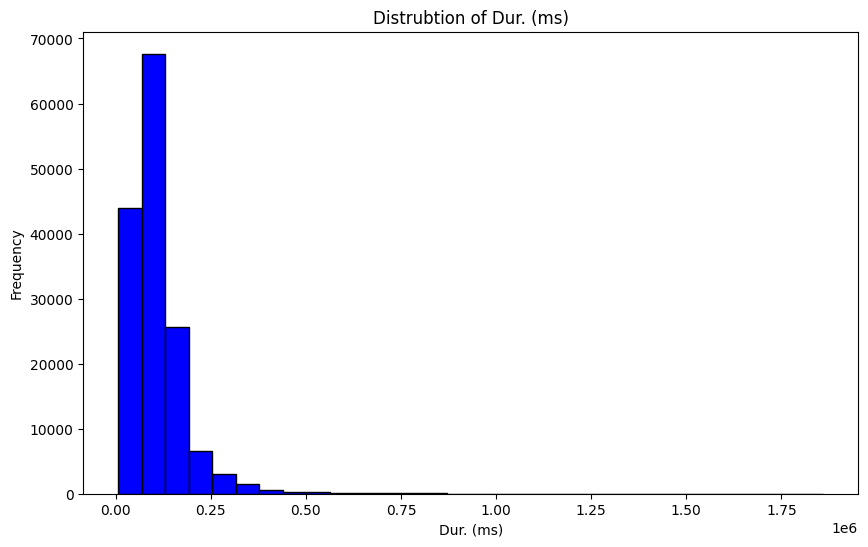

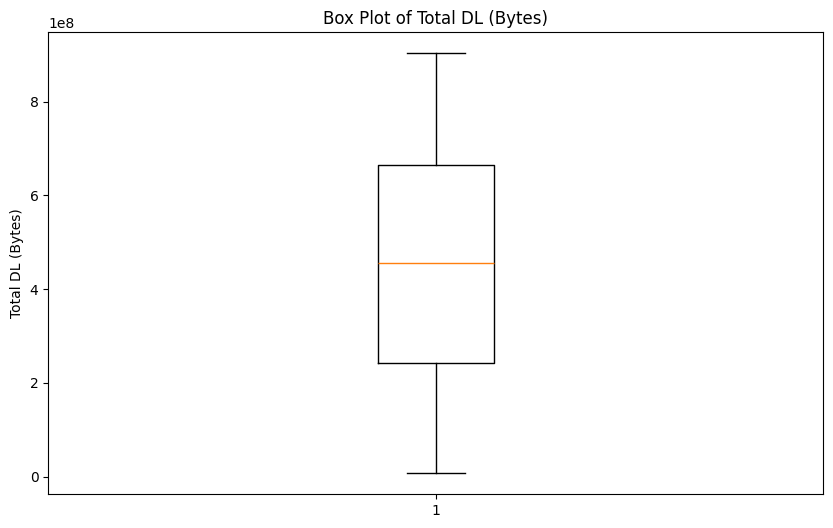

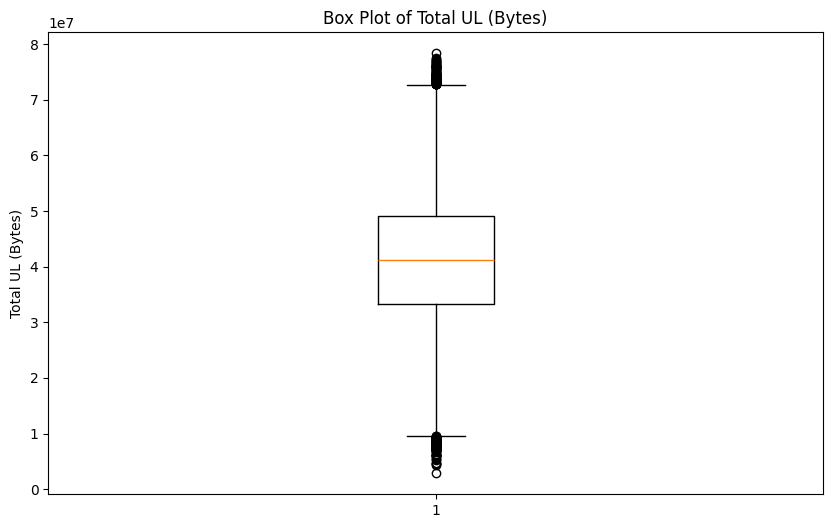

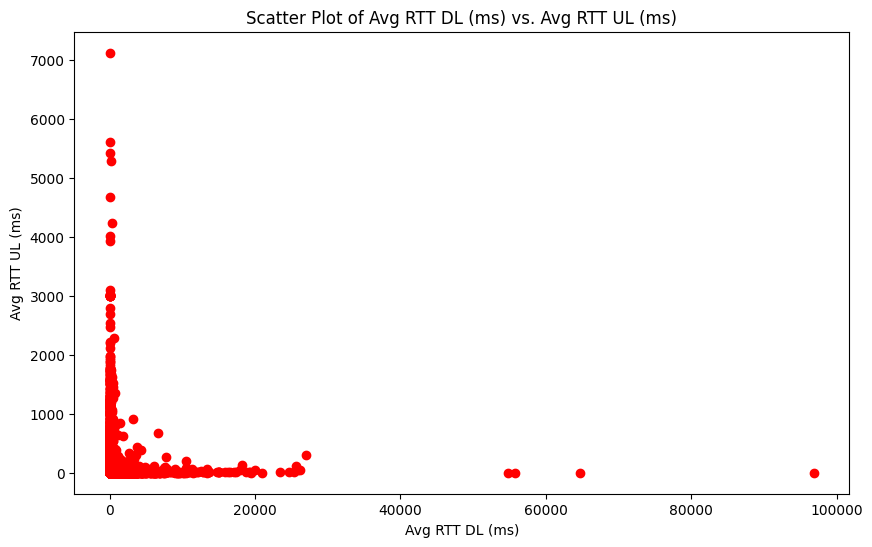

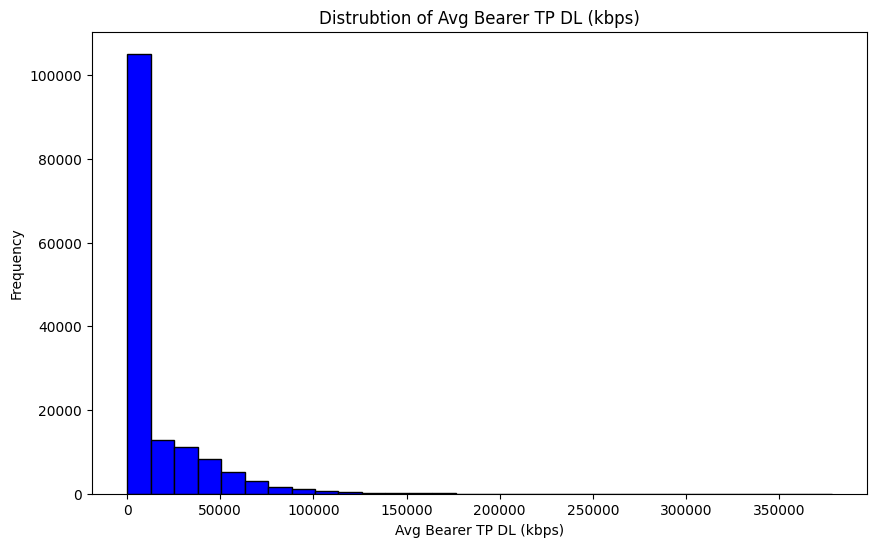

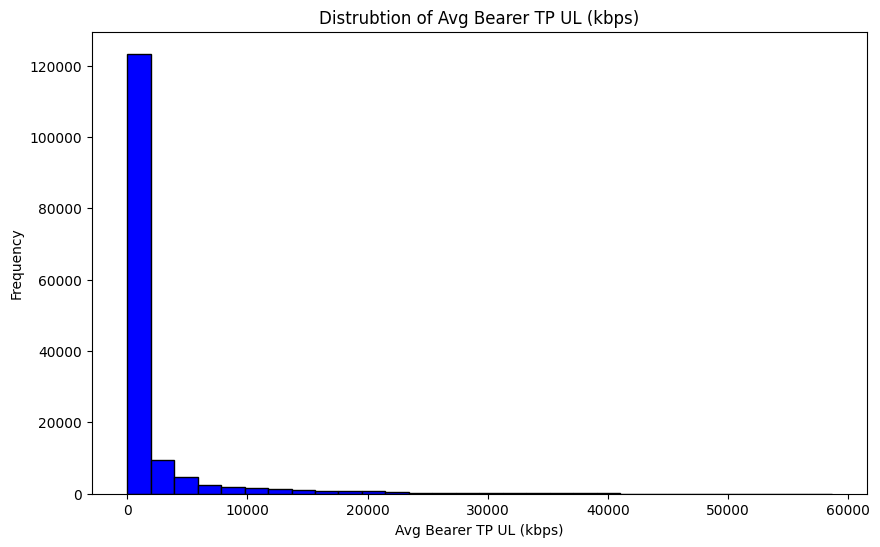

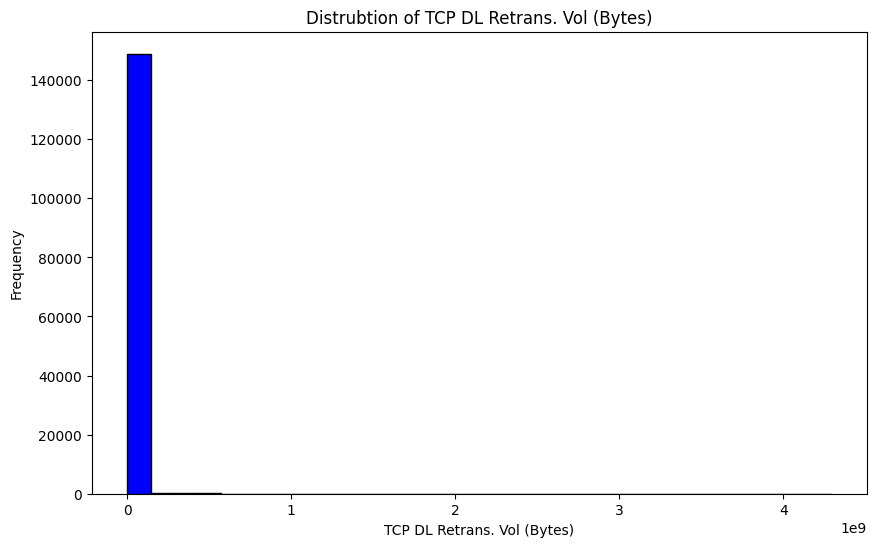

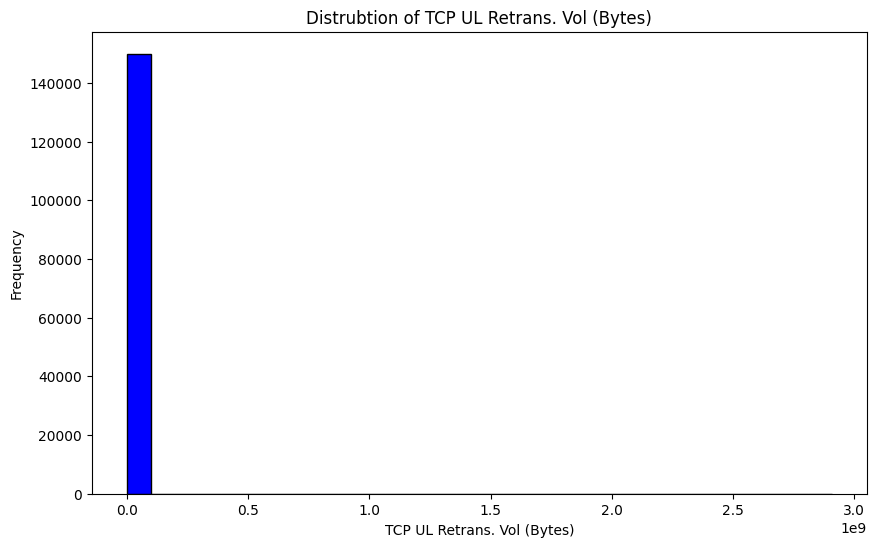

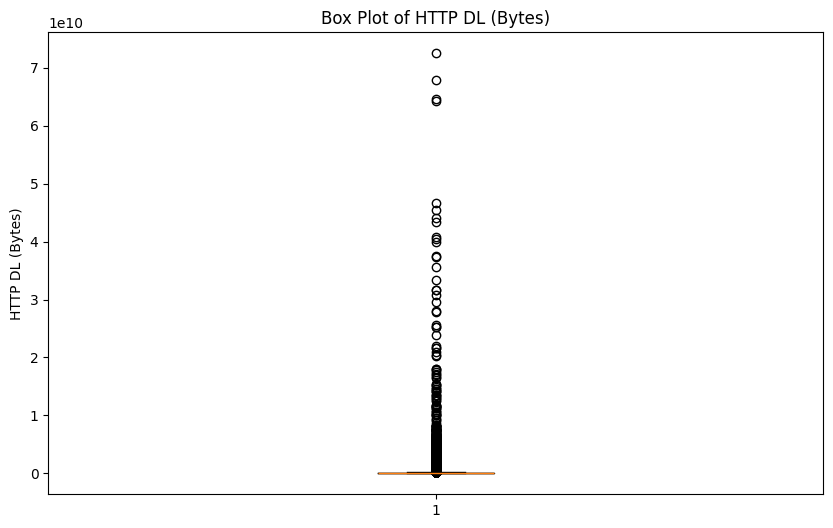

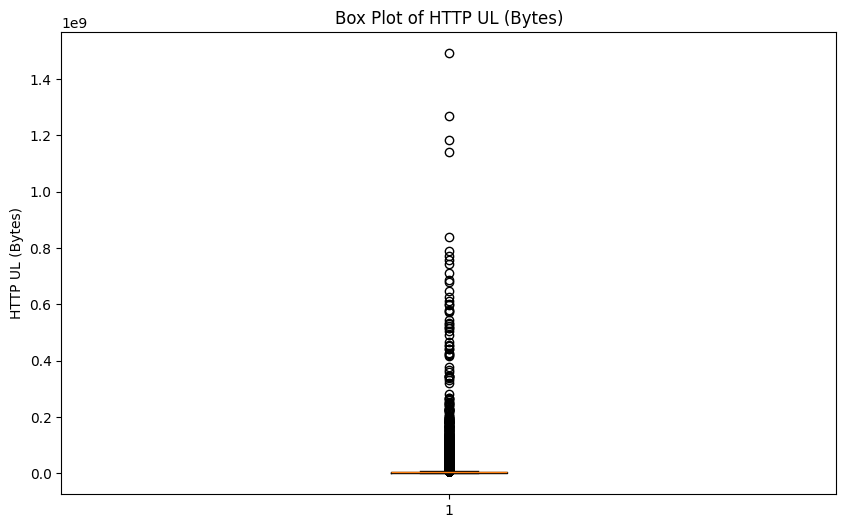

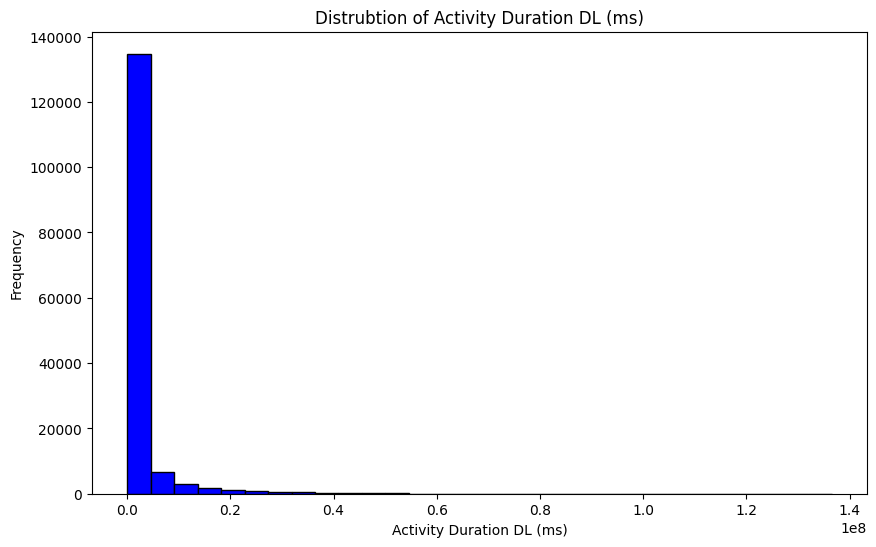

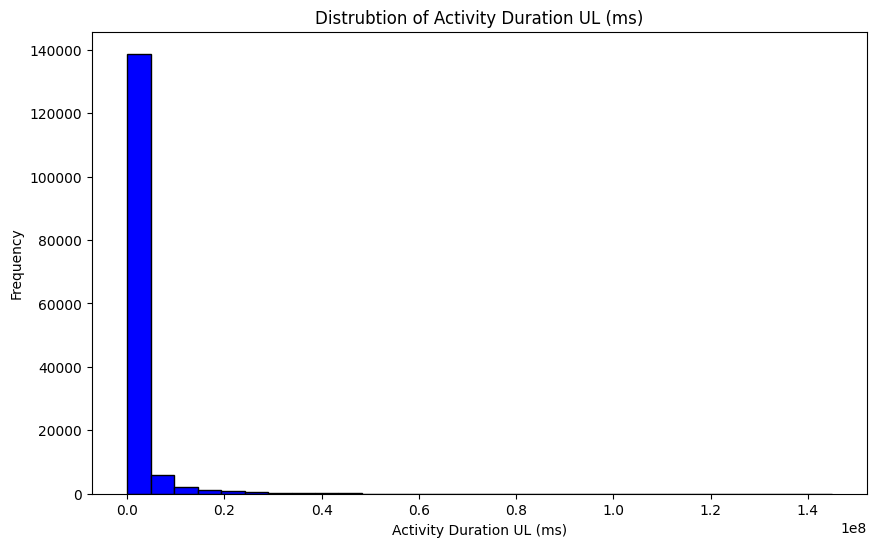

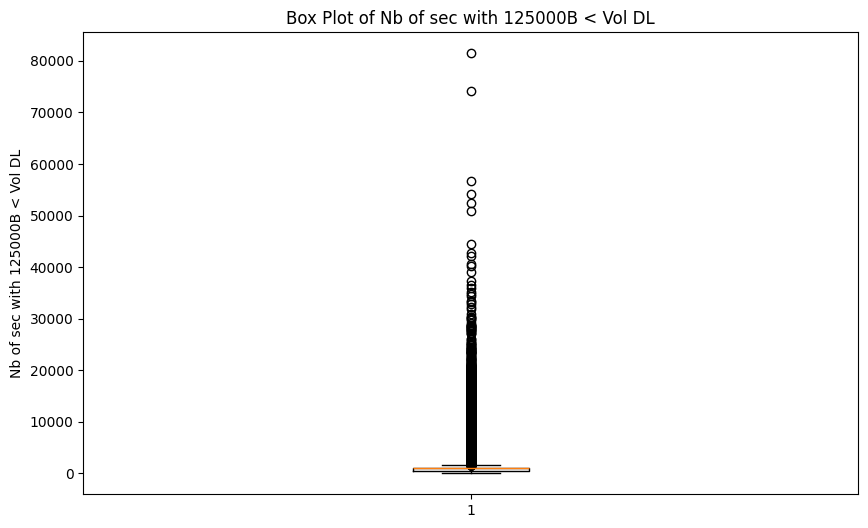

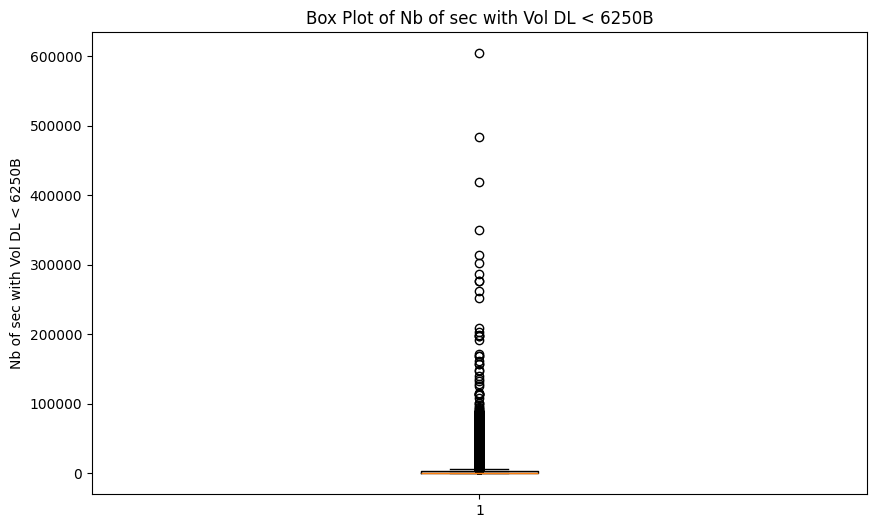

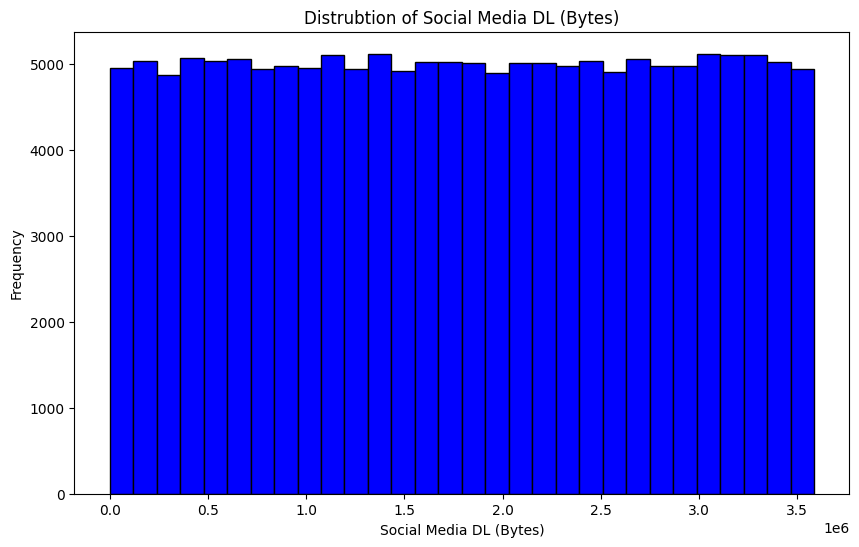

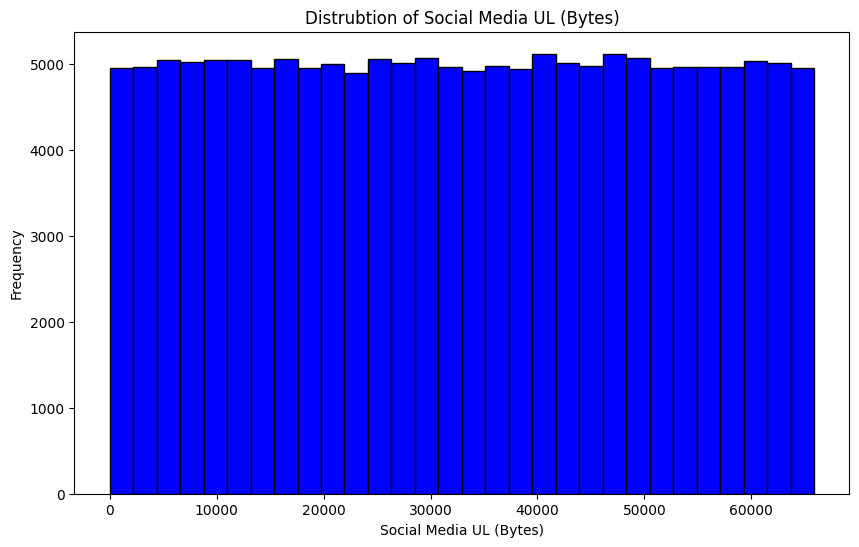

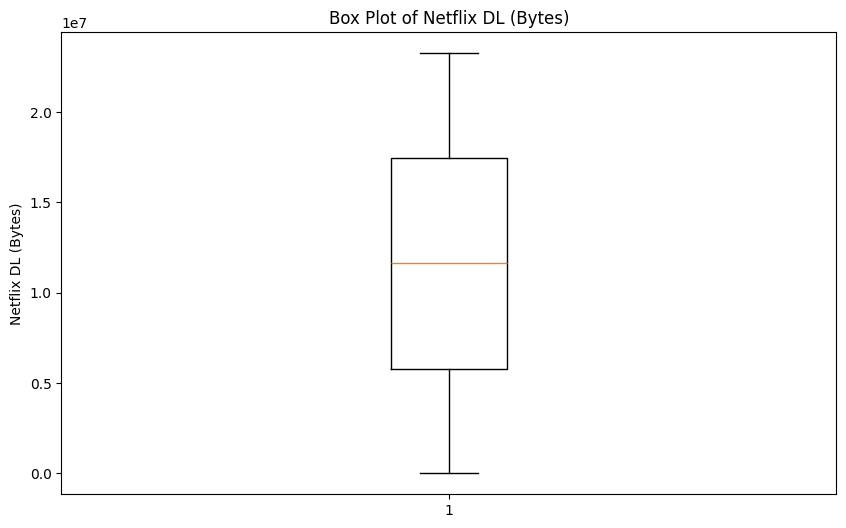

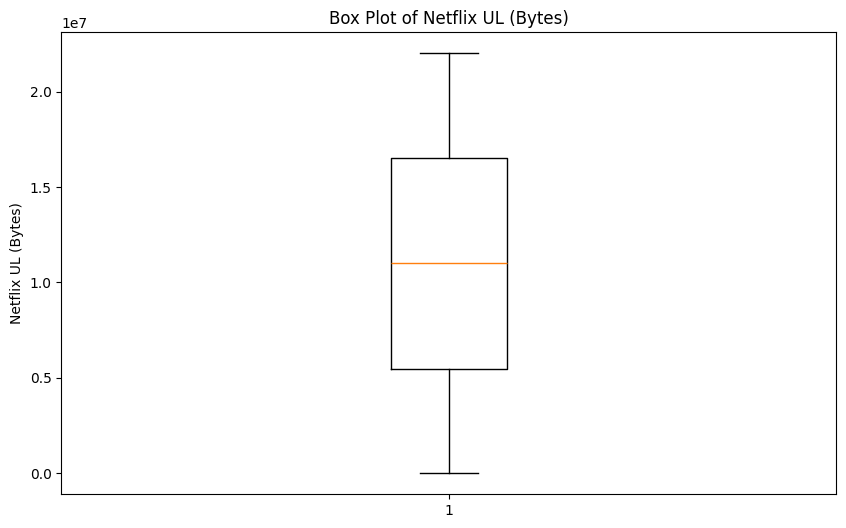

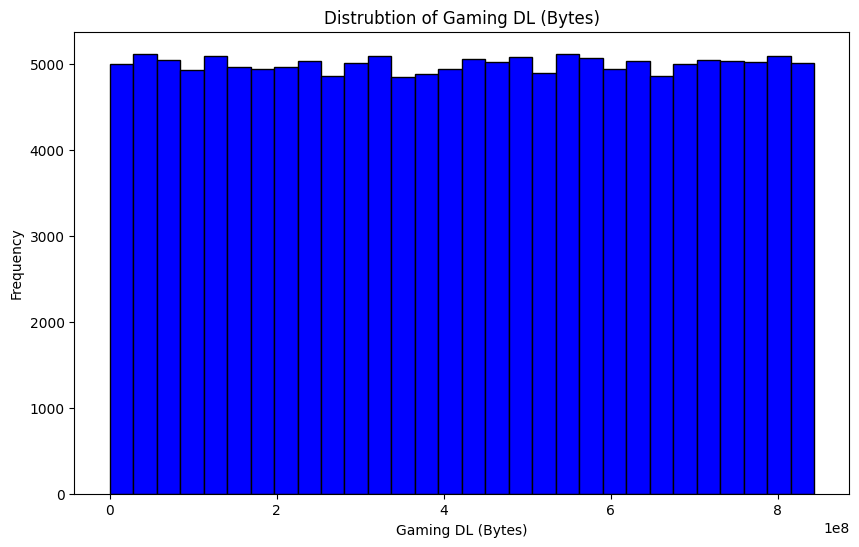

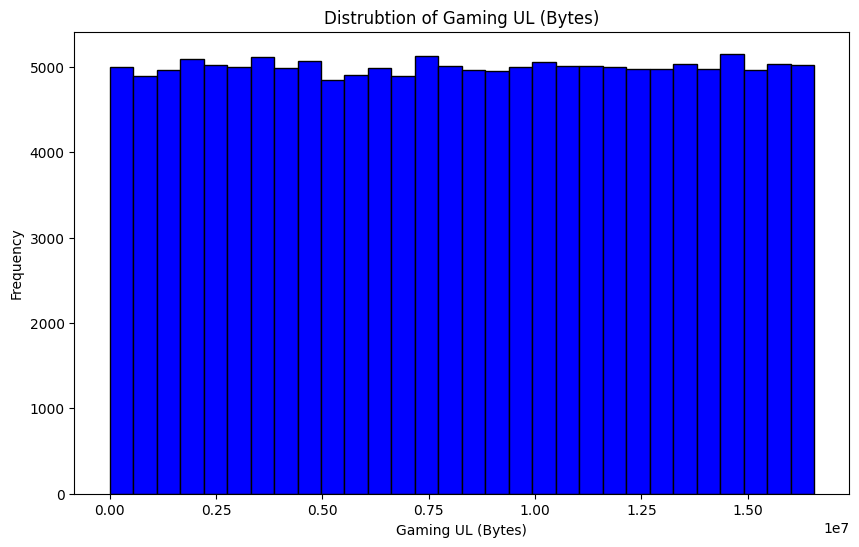

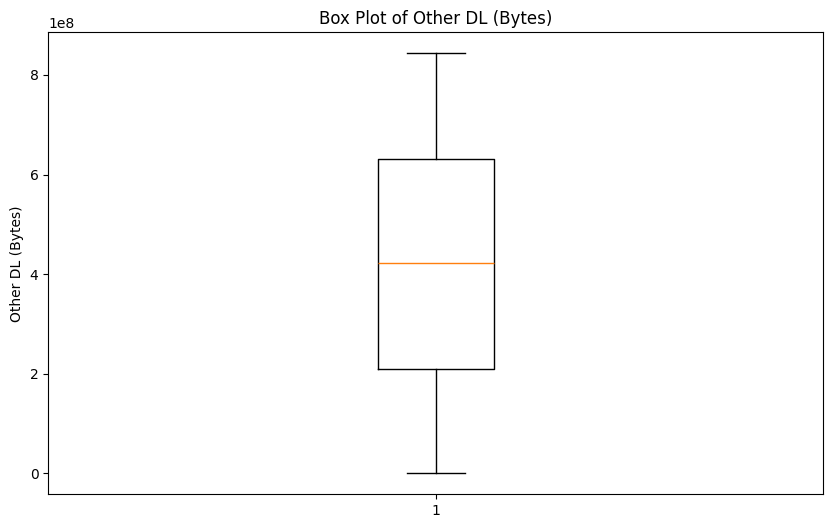

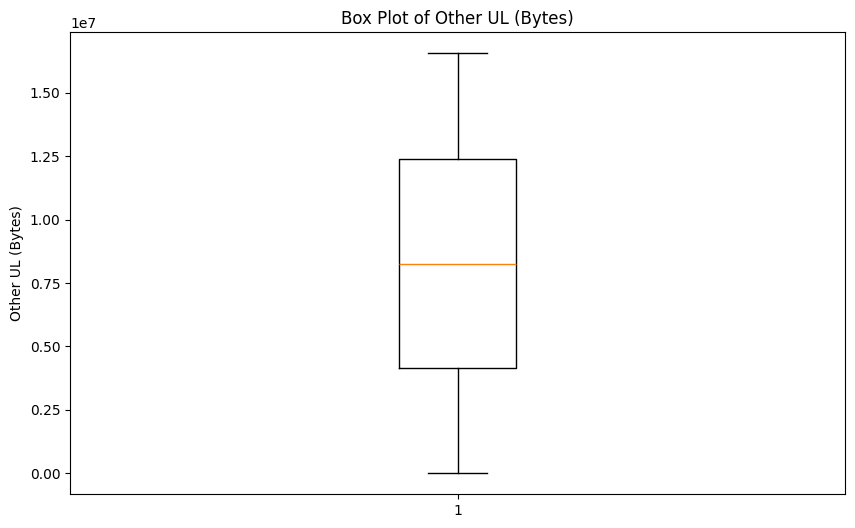

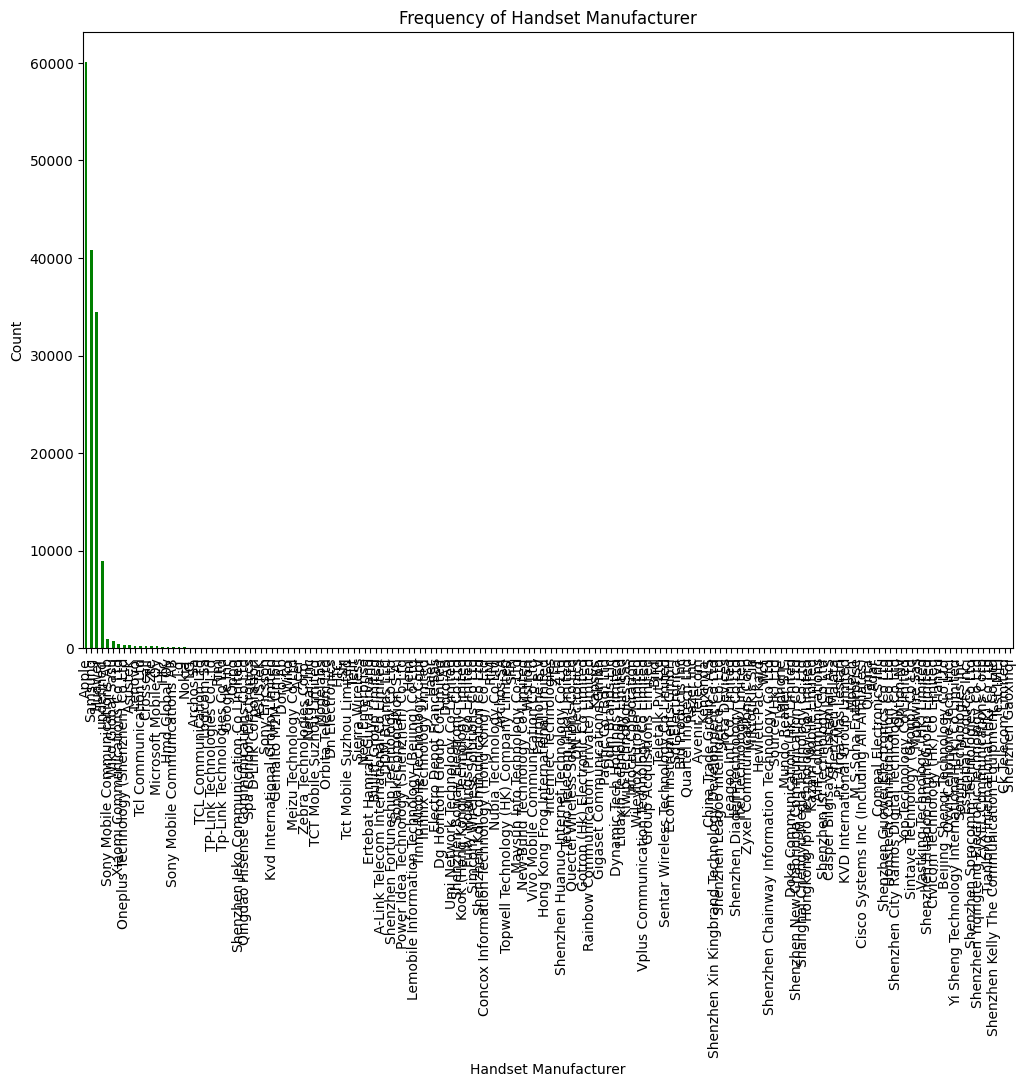

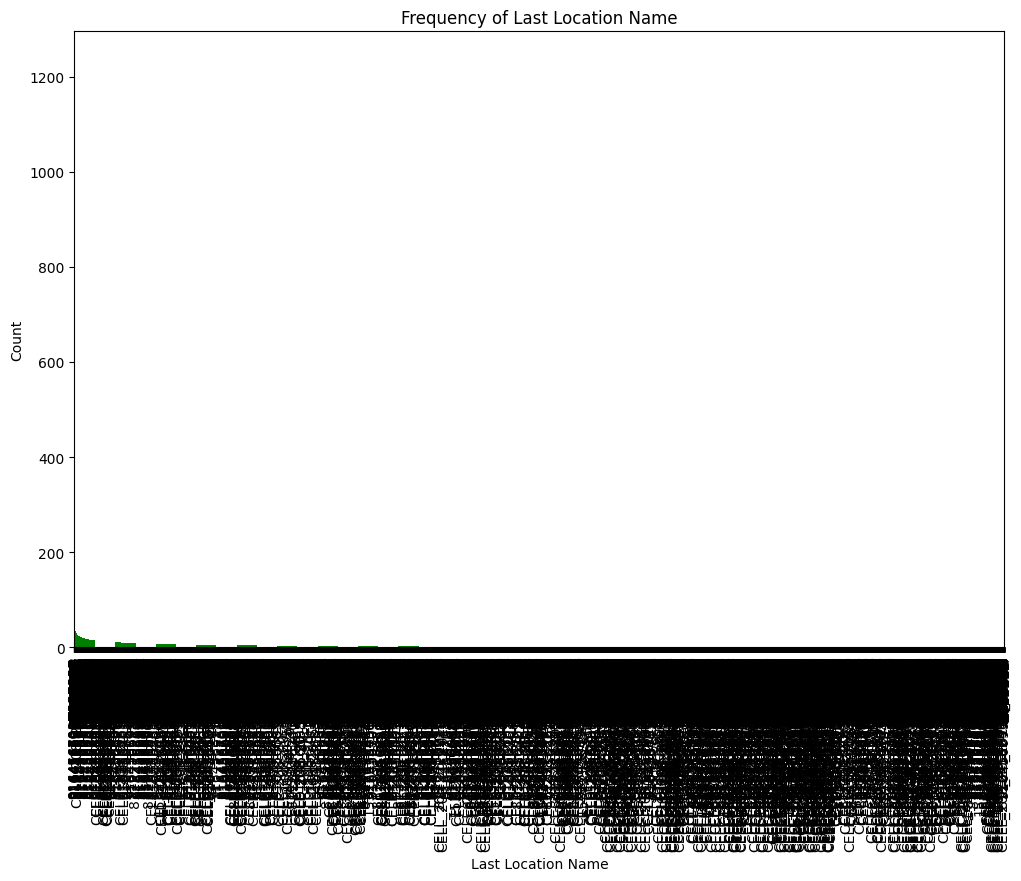

In [44]:
# plot_histogram,plot_box,plot_bar,plot_scatter,plot_pie
plot_histogram(df,'Dur. (ms)')
plot_box(df,'Total DL (Bytes)')
plot_box(df,'Total UL (Bytes)')
plot_scatter(df,'Avg RTT DL (ms)','Avg RTT UL (ms)')
plot_histogram(df,'Avg Bearer TP DL (kbps)')
plot_histogram(df,'Avg Bearer TP UL (kbps)')
plot_histogram(df,'TCP DL Retrans. Vol (Bytes)')
plot_histogram(df,'TCP UL Retrans. Vol (Bytes)')
plot_box(df,'HTTP DL (Bytes)')
plot_box(df,'HTTP UL (Bytes)')
plot_histogram(df,'Activity Duration DL (ms)')
plot_histogram(df,'Activity Duration UL (ms)')
plot_box(df,'Nb of sec with 125000B < Vol DL')
plot_box(df,'Nb of sec with Vol DL < 6250B')
plot_histogram(df,'Social Media DL (Bytes)')
plot_histogram(df,'Social Media UL (Bytes)')
plot_box(df,'Netflix DL (Bytes)')
plot_box(df,'Netflix UL (Bytes)')
plot_histogram(df,'Gaming DL (Bytes)')
plot_histogram(df,'Gaming UL (Bytes)')
plot_box(df,'Other DL (Bytes)')
plot_box(df,'Other UL (Bytes)')
plot_bar(df,'Handset Manufacturer')
plot_bar(df,'Last Location Name')










